# Perceptron without optimization, Perceptron with gradient decesent optimization and Perceptron with SGD optimization 


In [233]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [195]:
class Perceptron:
    def __init__(self, eta=0.1, n_iter=50, random_state=1):
        self.eta =eta
        self.n_iter=n_iter
        self.random_state=random_state
        
    def fit(self, X,y):
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta*(target-self.predict(xi))
                self.w_[1:]+= update*xi
                self.w_[0]+= update
                errors += int(update != 0.0)
                
            self.errors_.append(errors)
        return self
                
    
    def net_input(self,X):
        return np.dot(X, self.w_[1:])+self.w_[0]
                
    def predict(self, X):
        return np.where(self.net_input(X) >=3.0,1,-1)

Training a perceptron model on the Iris dataset

In [196]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


ploting the iris data

In [197]:
y= df.iloc[0:100, 4].values
y.dtype

dtype('O')

In [198]:
y = np.where(y == 'Iris-setosa', -1, 1)
y1 = y.copy()

In [199]:
X = df.iloc[0:100, 0:2].values
X1 = X.copy() # For adaptive perceptron case,will use later
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [200]:
X

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1],
       [ 5.4,  3.7],
       [ 4.8,  3.4],
       [ 4.8,  3. ],
       [ 4.3,  3. ],
       [ 5.8,  4. ],
       [ 5.7,  4.4],
       [ 5.4,  3.9],
       [ 5.1,  3.5],
       [ 5.7,  3.8],
       [ 5.1,  3.8],
       [ 5.4,  3.4],
       [ 5.1,  3.7],
       [ 4.6,  3.6],
       [ 5.1,  3.3],
       [ 4.8,  3.4],
       [ 5. ,  3. ],
       [ 5. ,  3.4],
       [ 5.2,  3.5],
       [ 5.2,  3.4],
       [ 4.7,  3.2],
       [ 4.8,  3.1],
       [ 5.4,  3.4],
       [ 5.2,  4.1],
       [ 5.5,  4.2],
       [ 4.9,  3.1],
       [ 5. ,  3.2],
       [ 5.5,  3.5],
       [ 4.9,  3.1],
       [ 4.4,  3. ],
       [ 5.1,  3.4],
       [ 5. ,  3.5],
       [ 4.5,  2.3],
       [ 4.4,  3.2],
       [ 5. ,  3.5],
       [ 5.1,  3.8],
       [ 4.8,  3. ],
       [ 5.1,  3.8],
       [ 4.6,

In [201]:
X[:50,0]

array([ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
        4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
        4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
        5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
        5.1,  4.8,  5.1,  4.6,  5.3,  5. ])

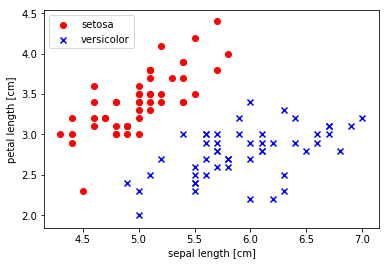

In [202]:
# initial 50 are setosa , later 50 are versicolor
plt.scatter(X[:50,0],X[:50,1],c='r', marker='o' ,label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],c='b', marker='x' ,label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

Training the Perceptron model

In [203]:
ppn = Perceptron()

In [204]:
ppn.fit(X,y)

In [205]:
ppn.errors_

[1,
 2,
 3,
 2,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

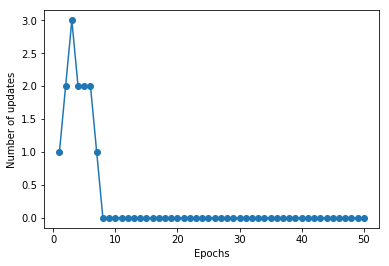

In [206]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

## A function for plotting decision regions
 

In [207]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution =0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
     # plot the decision surface
    x1_min, x1_max = X[:,0].min()-1 , X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1 , X[:,1].max()+1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        

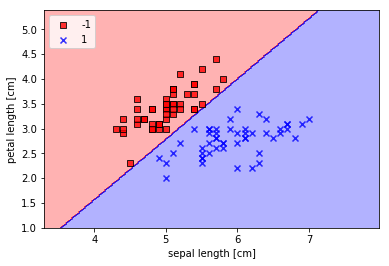

In [208]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


Adaptive linear neurons and the convergence of learning
...

Minimizing cost functions with gradient descent

In [215]:
# Almost everything is same except that we will do gradient decent 
# rather than an update on weights for each sample based on target value and 
# prediction for that sample

# we will also have a dummy activation function here. However the idea behind
# activation function should be for classification purpose like we can have sigmoid 
# for logistic regression, but here our focus is just on the gradient decent

class AdalineGD(object):
    
    def __init__(self, eta=0.1, n_iter=50, random_state=1):
        self.eta =eta
        self.n_iter=n_iter
        self.random_state=random_state
        
    def fit(self, X,y):
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1+X.shape[1])
#         self.errors_ = []
        self.cost_ = [] # new added compared to perceptron
        for i in range(self.n_iter):
#             for xi, target in zip(X,y):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            error = (y - output) # for entire sample in every iteration get the error. 
                
            self.w_[1:]+= self.eta* X.T.dot(error)
            self.w_[0]+= self.eta * error.sum()
            cost  =(error**2).sum()/2.0
            self.cost_.append(cost)
                
        return self
                
    
    def net_input(self,X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def activation(self, X):
        
        return X
                
    def predict(self, X):
#         return np.where(self.net_input(X) >=3.0,1,-1)
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

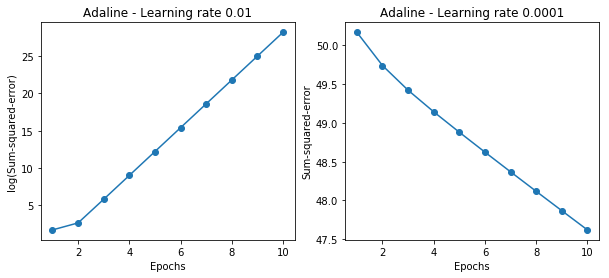

In [218]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10,eta=0.01)
ada1.fit(X,y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

Improving gradient descent through feature scaling

In [219]:
# standardize features
X_std = np.copy(X)
X_std[:,0] = (X[:,0]-X[:,0].mean())/X_std[:,0].std()
X_std[:,1] = (X[:,1]-X[:,1].mean())/X_std[:,1].std()


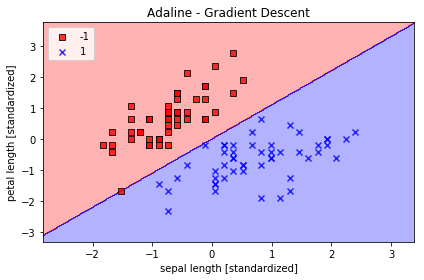

In [221]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

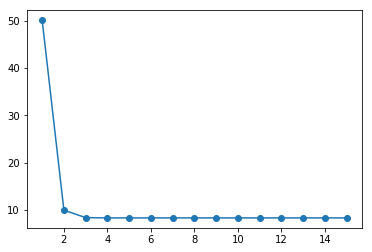

In [224]:
plt.plot(range(1,len(ada.cost_)+1), ada.cost_, marker = 'o')

## Large scale machine learning and stochastic gradient descent

In [231]:
# Almost everything is same as AdalineSD EXCEPT that we will do stochastic gradient decent 
# i.e. update weights for each sample for all of the samples and keep looping this till the count
#of iteration

class AdalineSGD(object):
    
    def __init__(self, eta=0.1, n_iter=50, random_state=1, shuffle=True):
        self.eta =eta
        self.n_iter=n_iter
        self.random_state=random_state
        self.w_initialized = False
        self.shuffle = shuffle
        
    def fit(self, X,y):
        
        self._initialize_weights(X.shape[1])
        self.cost_ = [] 
        for i in range(self.n_iter):
            if self.shuffle:
                X,y = self._shuffle(X,y)
                cost=[]
                for xi, target in zip(X,y):
                    cost.append(self._updateweights(xi,target))
                    
                avg_cost  = sum(cost)/len(y)
                self.cost_.append(avg_cost)

        return self
    
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _updateweights(self,xi,target):
        net_input = self.net_input(xi)
        output = self.activation(net_input)
        error = (target - output) # for entire sample in every iteration get the error. 

        self.w_[1:]+= self.eta* xi.dot(error)
        self.w_[0]+= self.eta * error
        cost = (error**2)/2
        return cost
        
    
    def _shuffle(self,X,y):
        
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
    
    def net_input(self,X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def activation(self, X):
        
        return X
                
    def predict(self, X):
#         return np.where(self.net_input(X) >=3.0,1,-1)
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

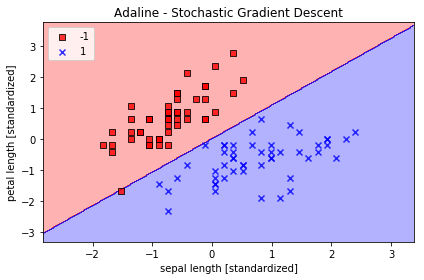

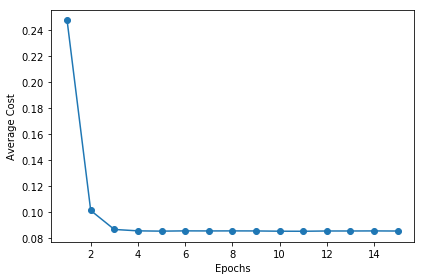

In [232]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()